In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
columnsUsers=['UserID','Gender','Age','OccupationNo','Zip-code']
columnRatings=['UserID','MovieID','Rating','Timestamp']
columnMovies=['MovieID','Title','Genres']

In [3]:
df_users=pd.read_table(r'C:\Users\user\Desktop\Learning\Jupyter Workspace\Project\Data science with Python 1\users.dat',
                        sep='::',header=None,
                        names=columnsUsers)


df_ratings=pd.read_table(r'C:\Users\user\Desktop\Learning\Jupyter Workspace\Project\Data science with Python 1\ratings.dat',
                        sep='::',header=None,
                        names=columnRatings)


df_movies=pd.read_table(r'C:\Users\user\Desktop\Learning\Jupyter Workspace\Project\Data science with Python 1\movies.dat',
                        sep='::',header=None,
                        names=columnMovies)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='pytho

In [4]:
df_movies['Action']=pd.np.where(df_movies.Genres.str.contains("Action"), "Y","N")
df_movies['Adventure']=pd.np.where(df_movies.Genres.str.contains("Adventure"), "Y","N")
df_movies['Animation']=pd.np.where(df_movies.Genres.str.contains("Animation"), "Y","N")
df_movies['Children']=pd.np.where(df_movies.Genres.str.contains("Children"), "Y","N")
df_movies['Comedy']=pd.np.where(df_movies.Genres.str.contains("Comedy"), "Y","N")
df_movies['Crime']=pd.np.where(df_movies.Genres.str.contains("Crime"), "Y","N")
df_movies['Documentary']=pd.np.where(df_movies.Genres.str.contains("Documentary"), "Y","N")
df_movies['Drama']=pd.np.where(df_movies.Genres.str.contains("Drama"), "Y","N")
df_movies['Fantasy']=pd.np.where(df_movies.Genres.str.contains("Fantasy"), "Y","N")
df_movies['Film-Noir']=pd.np.where(df_movies.Genres.str.contains("Film-Noir"), "Y","N")
df_movies['Horror']=pd.np.where(df_movies.Genres.str.contains("Horror"), "Y","N")
df_movies['Musical']=pd.np.where(df_movies.Genres.str.contains("Musical"), "Y","N")
df_movies['Mystery']=pd.np.where(df_movies.Genres.str.contains("Mystery"), "Y","N")
df_movies['Romance']=pd.np.where(df_movies.Genres.str.contains("Romance"), "Y","N")
df_movies['Sci-Fi']=pd.np.where(df_movies.Genres.str.contains("Sci-Fi"), "Y","N")
df_movies['Thriller']=pd.np.where(df_movies.Genres.str.contains("Thriller"), "Y","N")
df_movies['War']=pd.np.where(df_movies.Genres.str.contains("War"), "Y","N")
df_movies['Western']=pd.np.where(df_movies.Genres.str.contains("Western"), "Y","N")

In [5]:
idx=['MovieID','Title','Genres']

multi_indexed_df = df_movies.set_index(idx)

stacked_df = multi_indexed_df.stack(dropna=False)

long_df = stacked_df.reset_index()

In [6]:
df_new = long_df.rename(columns={'MovieID':'MovieID','Title':'Title','Genres':'GenresGroup','level_3':'Genre',0:'Value'})

df_movies=df_new[df_new['Value']=='Y']

In [7]:
df_movies.head()

,MovieID,Title,GenresGroup,Genre,Value
2,1,Toy Story (1995),Animation|Children's|Comedy,Animation,Y
3,1,Toy Story (1995),Animation|Children's|Comedy,Children,Y
4,1,Toy Story (1995),Animation|Children's|Comedy,Comedy,Y
19,2,Jumanji (1995),Adventure|Children's|Fantasy,Adventure,Y
21,2,Jumanji (1995),Adventure|Children's|Fantasy,Children,Y


In [8]:
df_users['AgeGroup'] = pd.cut(x=df_users['Age'],
                              bins=[0,1,18,25,35,45,50,56],labels=['Below 18','18-24','25-34','35-44','45-54','50-55','56+'])

In [9]:
data = { 'Occupation' : ['other','academic/educator','artist','clerical/admin' , 'college/grad student' , 'customer service' , 'doctor/health care',
        'executive/managerial' , 'farmer' , 'homemaker' , 'K-12 student' , 'lawyer' , 'programmer' , 'retired' , 'sales/marketing' , 'scientist' ,
        'self-employed' , 'technician/engineer' , 'tradesman/craftsman' , 'unemployed' , 'writer'],
        
        'OccupationNo': [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

# Create the pandas DataFrame 
df_Occupation = pd.DataFrame(data)

In [10]:
df_users=pd.merge(df_users,df_Occupation,on='OccupationNo',how='left')

In [11]:
df1=pd.merge(df_ratings,df_users,on='UserID',how='left') 

In [12]:
df2=pd.merge(df1,df_movies,on='MovieID',how='left')

In [13]:
df2.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,OccupationNo,Zip-code,AgeGroup,Occupation,Title,GenresGroup,Genre,Value
0,1,1193,5,978300760,F,1,10,48067,Below 18,K-12 student,One Flew Over the Cuckoo's Nest (1975),Drama,Drama,Y
1,1,661,3,978302109,F,1,10,48067,Below 18,K-12 student,James and the Giant Peach (1996),Animation|Children's|Musical,Animation,Y
2,1,661,3,978302109,F,1,10,48067,Below 18,K-12 student,James and the Giant Peach (1996),Animation|Children's|Musical,Children,Y
3,1,661,3,978302109,F,1,10,48067,Below 18,K-12 student,James and the Giant Peach (1996),Animation|Children's|Musical,Musical,Y
4,1,914,3,978301968,F,1,10,48067,Below 18,K-12 student,My Fair Lady (1964),Musical|Romance,Musical,Y


In [14]:
df_MasterData=df2[['MovieID','Title','UserID','Age','AgeGroup','Gender','Occupation','Rating']]

In [15]:
df_MasterData['AgeGroup'].value_counts().nunique()

7

In [16]:
df1 = df_MasterData.drop_duplicates(['UserID','Age','AgeGroup','Gender','Occupation'], keep='last')
# df_MasterData.drop_duplicates(subset=['UserID','Age','AgeGroup','Gender','Occupation'])

In [17]:
a=df1['AgeGroup'].value_counts()

In [18]:
#df1['Members'] = df1['AgeGroup'].value_counts()
df1.head()

,MovieID,Title,UserID,Age,AgeGroup,Gender,Occupation,Rating
115,1246,Dead Poets Society (1989),1,1,Below 18,F,K-12 student,4
403,1247,"Graduate, The (1967)",2,56,56+,M,self-employed,5
526,2081,"Little Mermaid, The (1989)",3,25,25-34,M,scientist,4
584,1240,"Terminator, The (1984)",4,45,45-54,M,executive/managerial,5
936,714,Dead Man (1995),5,25,25-34,M,writer,4


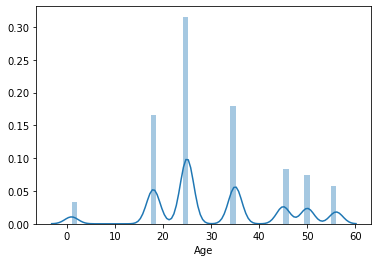

In [19]:
sns.distplot(df1.Age)

In [20]:
df1['AgeGroup'].value_counts()

25-34       2096
35-44       1193
18-24       1103
45-54        550
50-55        496
56+          380
Below 18     222
Name: AgeGroup, dtype: int64

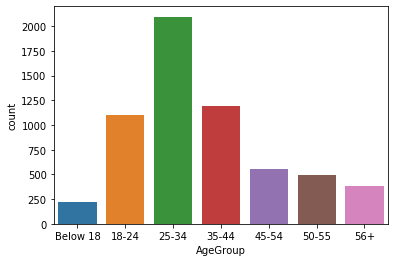

In [21]:
sns.countplot(x='AgeGroup',data=df1)

In [22]:
df_TS=df_MasterData[df_MasterData['Title']=='Toy Story (1995)']
df_TS['Rating'].value_counts()

4    2505
5    2460
3    1035
2     183
1      48
Name: Rating, dtype: int64

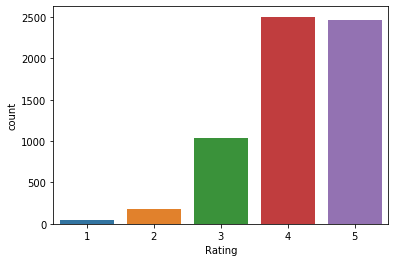

In [23]:
sns.countplot(x='Rating',data=df_TS)

In [24]:
df4=df_MasterData.drop_duplicates(subset=['MovieID','Title','Rating'])
#df4=df_MasterData[['MovieID','Title','Rating']]
df4

,MovieID,Title,UserID,Age,AgeGroup,Gender,Occupation,Rating
0,1193,One Flew Over the Cuckoo's Nest (1975),1,1,Below 18,F,K-12 student,5
1,661,James and the Giant Peach (1996),1,1,Below 18,F,K-12 student,3
4,914,My Fair Lady (1964),1,1,Below 18,F,K-12 student,3
6,3408,Erin Brockovich (2000),1,1,Below 18,F,K-12 student,4
7,2355,"Bug's Life, A (1998)",1,1,Below 18,F,K-12 student,5
...,...,...,...,...,...,...,...,...
2079647,3288,Cotton Mary (1999),5977,35,35-44,M,academic/educator,3
2081557,3304,Blue Collar (1978),5981,35,35-44,M,executive/managerial,1
2087829,138,"Neon Bible, The (1995)",6001,25,25-34,F,executive/managerial,1
2098250,981,Dangerous Ground (1997),6035,25,25-34,F,academic/educator,1


In [25]:
df_top25=df4.nlargest(25, ['Rating']) 

In [26]:
df_top25[['MovieID','Title','Rating']]

,MovieID,Title,Rating
0,1193,One Flew Over the Cuckoo's Nest (1975),5
7,2355,"Bug's Life, A (1998)",5
14,1287,Ben-Hur (1959),5
17,2804,"Christmas Story, A (1983)",5
26,595,Beauty and the Beast (1991),5
32,1035,"Sound of Music, The (1965)",5
38,3105,Awakenings (1990),5
43,1270,Back to the Future (1985),5
45,527,Schindler's List (1993),5
48,48,Pocahontas (1995),5


In [27]:
df5=df_MasterData.drop_duplicates(subset=['MovieID','Title','Rating','UserID','Occupation','Age'])
df_userID=df5[df5['UserID']==2196]
df_userID

,MovieID,Title,UserID,Age,AgeGroup,Gender,Occupation,Rating
789398,2053,"Honey, I Blew Up the Kid (1992)",2196,25,25-34,M,programmer,2
789401,2997,Being John Malkovich (1999),2196,25,25-34,M,programmer,5
789402,3005,"Bone Collector, The (1999)",2196,25,25-34,M,programmer,3
789403,3203,Dead Calm (1989),2196,25,25-34,M,programmer,4
789404,2605,Entrapment (1999),2196,25,25-34,M,programmer,3
789406,3408,Erin Brockovich (2000),2196,25,25-34,M,programmer,4
789407,3409,Final Destination (2000),2196,25,25-34,M,programmer,5
789409,2490,Payback (1999),2196,25,25-34,M,programmer,4
789411,3298,Boiler Room (2000),2196,25,25-34,M,programmer,4
789412,2676,Instinct (1999),2196,25,25-34,M,programmer,4


In [28]:
df_MasterData.head()

,MovieID,Title,UserID,Age,AgeGroup,Gender,Occupation,Rating
0,1193,One Flew Over the Cuckoo's Nest (1975),1,1,Below 18,F,K-12 student,5
1,661,James and the Giant Peach (1996),1,1,Below 18,F,K-12 student,3
2,661,James and the Giant Peach (1996),1,1,Below 18,F,K-12 student,3
3,661,James and the Giant Peach (1996),1,1,Below 18,F,K-12 student,3
4,914,My Fair Lady (1964),1,1,Below 18,F,K-12 student,3


In [29]:
X=df_MasterData.iloc[:,:4]

In [30]:
X

,MovieID,Title,UserID,Age
0,1193,One Flew Over the Cuckoo's Nest (1975),1,1
1,661,James and the Giant Peach (1996),1,1
2,661,James and the Giant Peach (1996),1,1
3,661,James and the Giant Peach (1996),1,1
4,914,My Fair Lady (1964),1,1
...,...,...,...,...
2101810,1096,Sophie's Choice (1982),6040,25
2101811,1097,E.T. the Extra-Terrestrial (1982),6040,25
2101812,1097,E.T. the Extra-Terrestrial (1982),6040,25
2101813,1097,E.T. the Extra-Terrestrial (1982),6040,25


In [31]:
df_movies

,MovieID,Title,GenresGroup,Genre,Value
2,1,Toy Story (1995),Animation|Children's|Comedy,Animation,Y
3,1,Toy Story (1995),Animation|Children's|Comedy,Children,Y
4,1,Toy Story (1995),Animation|Children's|Comedy,Comedy,Y
19,2,Jumanji (1995),Adventure|Children's|Fantasy,Adventure,Y
21,2,Jumanji (1995),Adventure|Children's|Fantasy,Children,Y
...,...,...,...,...,...
69829,3949,Requiem for a Dream (2000),Drama,Drama,Y
69847,3950,Tigerland (2000),Drama,Drama,Y
69865,3951,Two Family House (2000),Drama,Drama,Y
69883,3952,"Contender, The (2000)",Drama|Thriller,Drama,Y


In [32]:
df2.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,OccupationNo,Zip-code,AgeGroup,Occupation,Title,GenresGroup,Genre,Value
0,1,1193,5,978300760,F,1,10,48067,Below 18,K-12 student,One Flew Over the Cuckoo's Nest (1975),Drama,Drama,Y
1,1,661,3,978302109,F,1,10,48067,Below 18,K-12 student,James and the Giant Peach (1996),Animation|Children's|Musical,Animation,Y
2,1,661,3,978302109,F,1,10,48067,Below 18,K-12 student,James and the Giant Peach (1996),Animation|Children's|Musical,Children,Y
3,1,661,3,978302109,F,1,10,48067,Below 18,K-12 student,James and the Giant Peach (1996),Animation|Children's|Musical,Musical,Y
4,1,914,3,978301968,F,1,10,48067,Below 18,K-12 student,My Fair Lady (1964),Musical|Romance,Musical,Y


In [33]:
df3=df2[['MovieID','Age','Rating']]

In [34]:
df3.head()

,MovieID,Age,Rating
0,1193,1,5
1,661,1,3
2,661,1,3
3,661,1,3
4,914,1,3


In [35]:
X=df3.iloc[:,:2]
y=df3.iloc[:,2:]

In [36]:
y.head()

,Rating
0,5
1,3
2,3
3,3
4,3


In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [38]:
#model = LogisticRegression()
#from sklearn.tree import DecisionTreeClassifier
#model = DecisionTreeClassifier()

In [54]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)

In [55]:
#Training
model.fit(X_train,y_train)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [56]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [48]:
actual = y_train
predicted = model.predict(X_train)
accuracy_score(actual,predicted)

0.4287883329408154

In [57]:
actual = y_test
predicted = model.predict(X_test)
accuracy_score(actual,predicted)

0.4084255750387165

In [59]:
model.score(X_train,y_train)

0.4290773688454978

In [60]:
a=round(model.score(X_train,y_train)*100,2)
a

42.91

In [50]:
print(metrics.classification_report(actual,predicted))

              precision    recall  f1-score   support

           1       0.38      0.17      0.23     23312
           2       0.31      0.10      0.15     45382
           3       0.37      0.34      0.36    110098
           4       0.41      0.61      0.49    146297
           5       0.48      0.39      0.43     95274

    accuracy                           0.41    420363
   macro avg       0.39      0.32      0.33    420363
weighted avg       0.40      0.41      0.39    420363



In [ ]:
mapGender={'M': 1, 'F': 0}
df_MasterData['Gender']=df_MasterData['Gender'].map(mapGender)

In [ ]:
# Random


In [ ]:
ListofGenres=df_MasterData.Genres.str.split("|")
col=[]

for i in ListofGenres:
    for j in i:
        if j not in col:
            col.append(j)
            
col.append("MovieID")
col.append("Genres")
col.append("Rating")

df2=pd.DataFrame(columns=col)

df3=df_MasterData[["MovieID","Genres","Gender","Rating"]]

for index , row in df3.head(2000).iterrows():
    temp=row.Genres.split("|") 
    
    for i in temp:
        #print(a)
        df2.loc[index,i]=1
        df2.loc[index,"MovieID"]=df3.loc[index,"MovieID"]
        df2.loc[index,"Gender"]=df3.loc[index,"Gender"]
        df2.loc[index,"Genres"]=df3.loc[index,"Genres"]
        df2.loc[index,"Rating"]=df3.loc[index,"Rating"]
        
    df2.loc[index,df2.columns[~df2.columns.isin(temp+["MovieID","Genres","Gender","Rating"])]]=0

In [ ]:
df2.head()

In [ ]:
X=df2[df2.columns[~df2.columns.isin(["Rating","Genres"])]]
Y=df2.Rating

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state=42)

number=LabelEncoder()
X_train.Gender=number.fit_transform(X_train["Gender"].astype("str"))
X_test.Gender=number.fit_transform(X_test["Gender"].astype("str"))
y_train.Gender=number.fit_transform(y_train["Gender"].astype("int"))
y_train.Gender=number.fit_transform(y_train["Gender"].astype("int"))